In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn.metrics
import anndata
from passenger.plot.plot import *

plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

/home/vmarotl/anaconda3/envs/passenger/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
AML_S2_patients = np.array(["P"+str(i) for i in np.arange(1, 5)])
AML_10X_patients = np.array(["A"+str(i) for i in np.arange(1, 16)])
LUNG_patients = ["p018", "p019", "p023", "p030", "p031","p032", "p033"]
CRC_patient = ["p007", "p013", "p014", "p016", "p020", "p026"]

In [4]:
AML_S2_adata = []
for p in AML_S2_patients:
    AML_S2_adata.append(anndata.read_h5ad("../processed_data/AML_MutaSeq/"+p+".h5ad"))
    
AML_10X_adata = []
for p in AML_10X_patients:
    AML_10X_adata.append(anndata.read_h5ad("../processed_data/AML_10X//"+p+".h5ad"))
    
LUNG_adata = []
for p in LUNG_patients:
    LUNG_adata.append(anndata.read_h5ad("../processed_data/LUNG/"+p+".h5ad"))
    
CRC_adata = []
for p in CRC_patient:
    CRC_adata.append(anndata.read_h5ad("../processed_data/CRC/"+p+".h5ad"))

AnnData object with n_obs × n_vars = 1256 × 3447
    obs: 'celltype_full', 'celltype', 'cell_labels', 'cancer_weight', 'healthy_weight'
    var: 'chr', 'pos', 'ref', 'mut', 'REDIdb', 'dbSNP', 'gene', 'cancer_ref', 'cancer_alt', 'cancer_cov', 'healthy_ref', 'healthy_alt', 'healthy_cov'
    uns: 'C_dist', 'all_C', 'factor_labels', 'filter_germline', 'min_MAF', 'weighted_E'
    obsm: 'C', 'C_std', 'ref_assignments', 'umap', 'vireo_ID_prob'
    varm: 'V', 'V_std', 'vireo_var_prob'
    layers: 'ALT', 'M', 'REF', 'weights'
AnnData object with n_obs × n_vars = 904 × 3790
    obs: 'celltype_full', 'celltype', 'cell_labels', 'cancer_weight', 'healthy_weight'
    var: 'chr', 'pos', 'ref', 'mut', 'REDIdb', 'dbSNP', 'gene', 'cancer_ref', 'cancer_alt', 'cancer_cov', 'healthy_ref', 'healthy_alt', 'healthy_cov'
    uns: 'C_dist', 'all_C', 'factor_labels', 'filter_germline', 'min_MAF', 'weighted_E'
    obsm: 'C', 'C_std', 'ref_assignments', 'umap', 'vireo_ID_prob'
    varm: 'V', 'V_std', 'vireo_var_pr

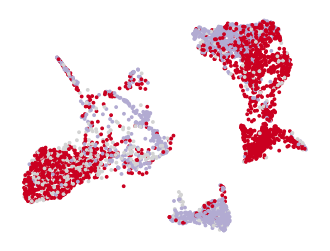

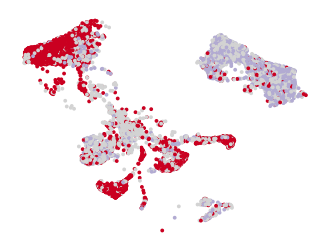

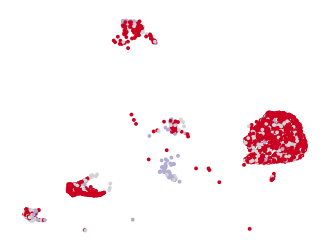

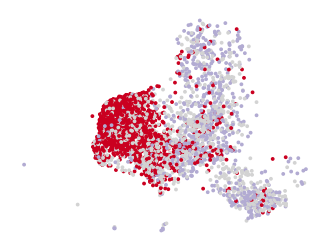

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.axis('off')
for adata in AML_S2_adata:
    umap = adata.obsm["umap"]
    print(adata)
    plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = [color_map[i] for i in adata.obs.cell_labels],
                s=3)   
save_path = "../figures/Fig1_A_AML_S2_umap.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.axis('off')
for adata in AML_10X_adata:
    if "cell_labels" in adata.obs.columns:
        umap = adata.obsm["umap"]
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = [color_map[i] for i in adata.obs.cell_labels] ,
                s=3 )  
save_path = "../figures/Fig1_B_AML_10X_umap.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.axis('off')
for adata in LUNG_adata:
    if "cell_labels" in adata.obs.columns:
        umap = adata.obsm["umap"]
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = [color_map[i] for i in adata.obs.cell_labels] ,
                s=3)  
#save_path = "../figures/LUNG_umap.pdf"
#fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.axis('off')
for adata in CRC_adata:
    if "cell_labels" in adata.obs.columns:
        umap = adata.obsm["umap"]
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = [color_map[i] for i in adata.obs.cell_labels] ,
                s=3)  
#save_path = "../figures/CRC_umap.pdf"
#fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

(1256, 3447)
(904, 3790)
(463, 209)
(476, 2487)


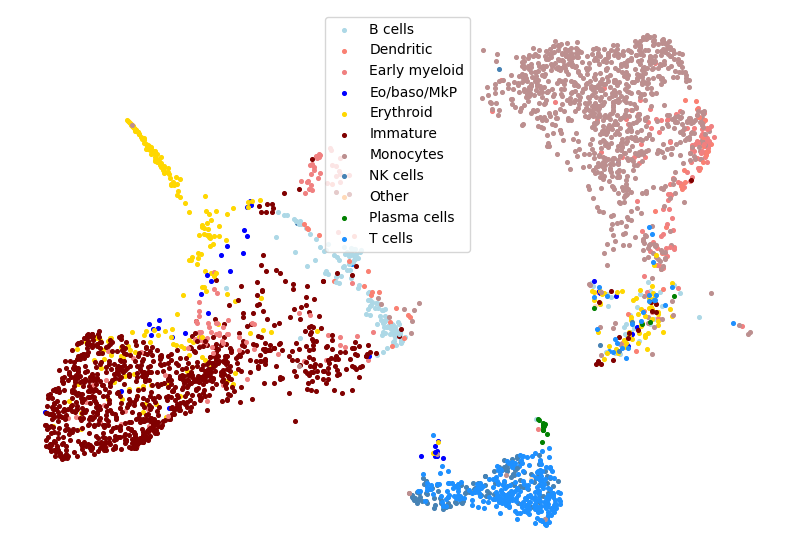

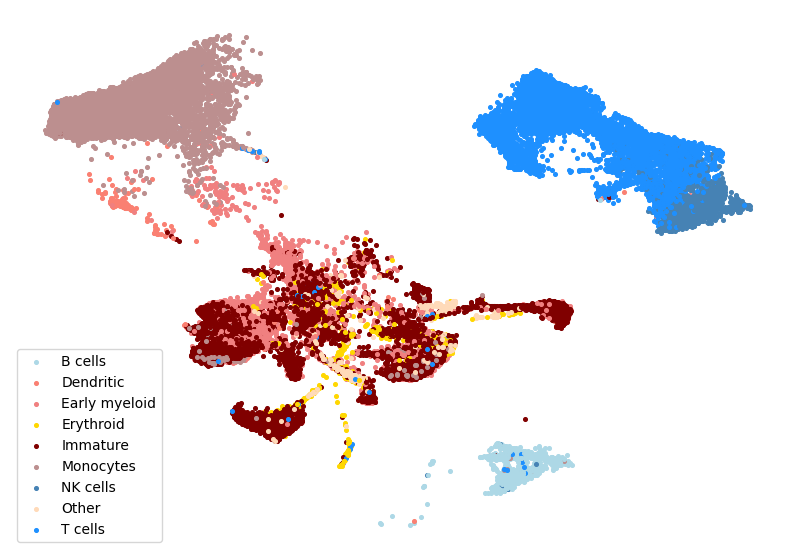

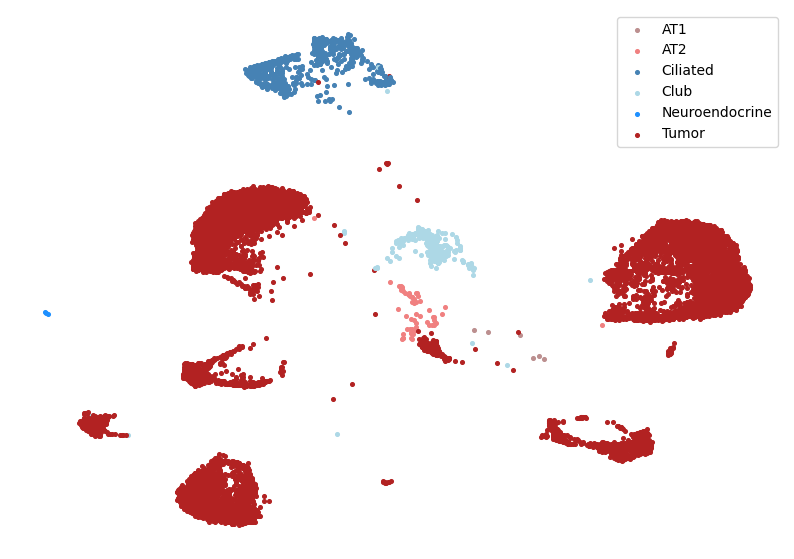

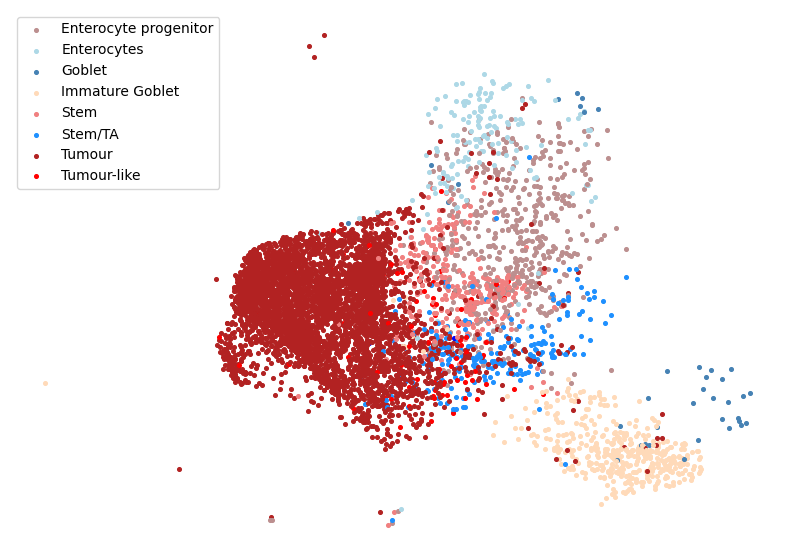

In [6]:
"""celltype_color_map = {"Blasts":"lightseagreen", "B cells and progenitors":"lightblue", 'Erythroid precursors':"gold",
                      'HSC/MPPs':"maroon", 'MEP':"wheat", 'Mitotic HSPCs (G2/M)':"chocolate", 'Neutrophil precursors':"lightcoral",
                      'T/NK cells':"dodgerblue"}

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(AML_S2_adata):
    umap = adata.obsm["umap"]
    for g in np.unique(adata.obs.celltype):
        i = adata.obs.celltype == g
        
        plt.scatter(umap.UMAP_1.loc[i], umap.UMAP_2.loc[i], 
                color = celltype_color_map[g], label = g if (j==0) else None,
                s=7)   
plt.legend()
save_path = "../figures/S6_AML_S2_umap_ct.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

celltype_color_map = {"Monocytes":"rosybrown", 'B cells':"lightblue", 'Erythroid':"gold",
                      'Immature':"maroon", 'NK cells':"steelblue", "Other":"peachpuff", 'Early myeloid':"lightcoral",
                      'T cells':"dodgerblue", 'Dendritic':"salmon"}"""

projected_ct = pd.read_csv("../ref_data/AML_MutaSeq/projected_cts.csv")
projected_ct = projected_ct.loc[projected_ct.id.str[0]!="p"]
convert_names = pd.read_csv("../ref_data/AML_MutaSeq/convert_Mutaseq_to_filename.txt", index_col=2)
projected_ct.index = convert_names.loc[projected_ct.id.tolist()]["0"]
loc = np.array((projected_ct.id.str[0:2]=="P3")|(projected_ct.id.str[0:2]=="P4"))
index = np.array(projected_ct.index.tolist())
index[loc]=np.array(convert_names.loc[projected_ct.id.tolist()].loc[loc].index)
projected_ct.index = index

celltype_color_map = {"Monocytes":"rosybrown", 'B cells':"lightblue", 'Erythroid':"gold",
                      'Immature':"maroon", 'NK cells':"steelblue", "Other":"peachpuff", 'Early myeloid':"lightcoral",
                      'T cells':"dodgerblue", 'Dendritic':"salmon", 'Eo/baso/MkP':"blue", 'Plasma cells':"green"}


fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(AML_S2_adata):
    #if "cell_labels" in adata.obs.columns:
    adata = adata[np.intersect1d(adata.obs_names, projected_ct.index)]
    print(adata.shape)
    for g in np.unique(projected_ct.ct_simple):
        umap = adata.obsm["umap"]
        i = projected_ct.ct_simple.loc[adata.obs_names] == g
        plt.scatter(umap.UMAP_1.loc[i], umap.UMAP_2.loc[i], 
                color = celltype_color_map[g], label = g if (j==0) else None,
                s=7)   
plt.legend()
save_path = "../figures/S6_AML_S2_umap_ct_projected.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(AML_10X_adata):
    #if "cell_labels" in adata.obs.columns:
    for g in np.unique(adata.obs.celltype):
        umap = adata.obsm["umap"]
        i = adata.obs.celltype == g
        plt.scatter(umap.UMAP_1.loc[i], umap.UMAP_2.loc[i], 
                color = celltype_color_map[g], label = g if (j==0) else None,
                s=7)   
plt.legend()
save_path = "../figures/S6_AML_10X_umap_ct.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


celltype_color_map = {"AT1":"rosybrown", 'Club':"lightblue", 
                      'Ciliated':"steelblue", "At1":"peachpuff", 'AT2':"lightcoral",
                      "Tumor":"firebrick", 'Neuroendocrine':"dodgerblue"
                      #'T cells':"dodgerblue", 'Dendritic':"salmon"
                     }


fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(LUNG_adata):
    for g in np.unique(adata.obs.celltype):
        umap = adata.obsm["umap"]
        i = adata.obs.celltype == g
        plt.scatter(umap.UMAP_1.loc[i], umap.UMAP_2.loc[i], 
                color = celltype_color_map[g], label = g if (j==0) else None,
                s=7)   
plt.legend()
save_path = "../figures/S14_LUNG_umap_ct.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


celltype_color_map = {'Enterocyte progenitor':"rosybrown", 'Enterocytes':"lightblue", 
                      'Goblet':"steelblue", 'Immature Goblet':"peachpuff", 'Stem':"lightcoral",
                      "Tumour":"firebrick", 'Stem/TA':"dodgerblue", 'Tuft':"blue", 'Tumour-like':"red"
                     }


fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(CRC_adata):
    for g in np.unique(adata.obs.celltype):
        umap = adata.obsm["umap"]
        i = adata.obs.celltype == g
        plt.scatter(umap.UMAP_1.loc[i], umap.UMAP_2.loc[i], 
                color = celltype_color_map[g], label = g if (j==0) else None,
                s=7)   
plt.legend()
save_path = "../figures/S15_CRC_umap_ct.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


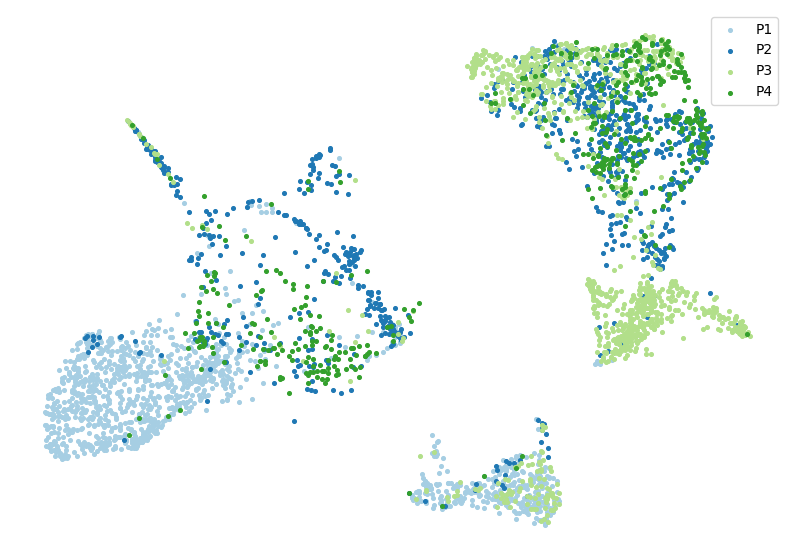

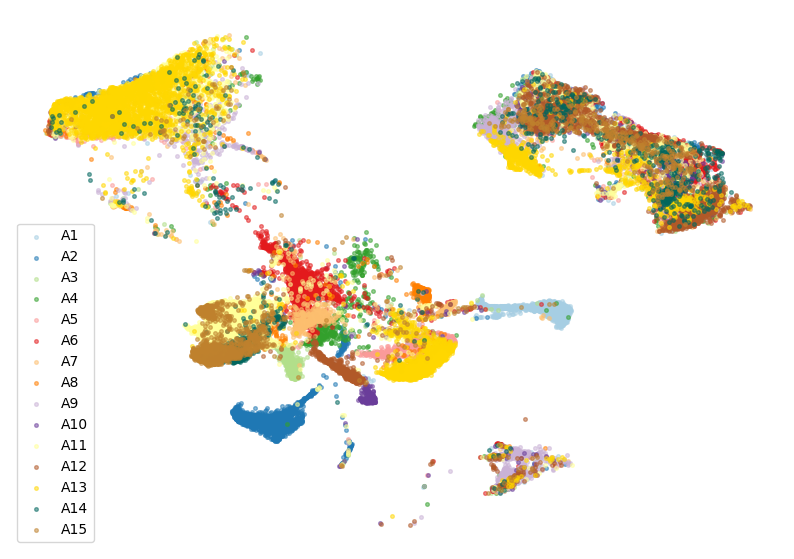

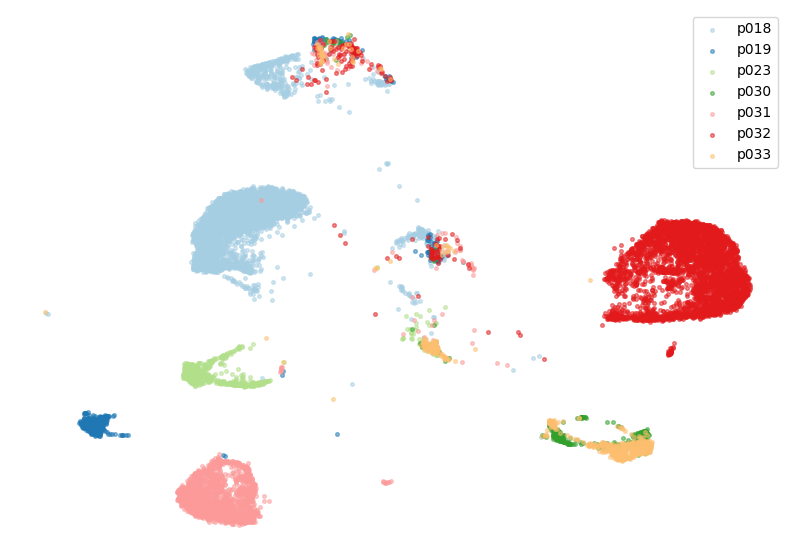

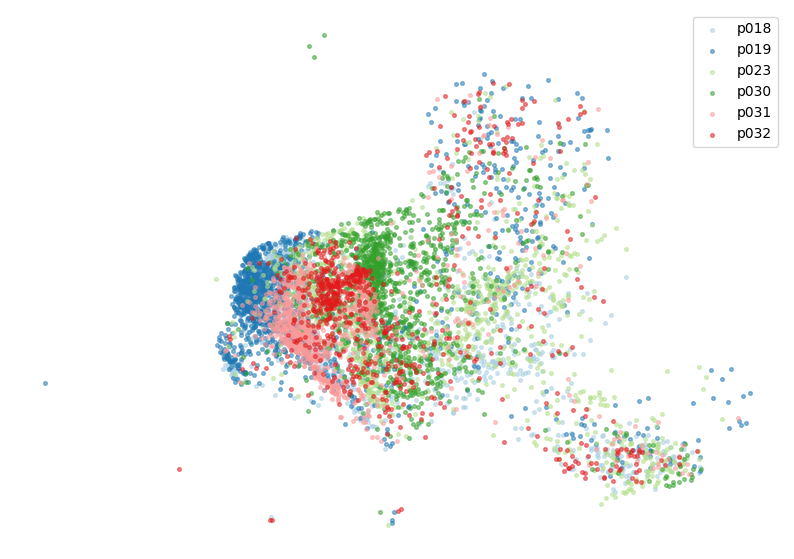

In [7]:
patient_colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
                  "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a",
                  "#ffff99", "#b15928", "gold", "#01665e", "#bf812d"]

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(AML_S2_adata):
    umap = adata.obsm["umap"]
    plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = patient_colors[j],
                label = AML_S2_patients[j], 
                s=7)   
plt.legend()
save_path = "../figures/S6_AML_S2_umap_patients.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(AML_10X_adata):
    umap = adata.obsm["umap"]
    plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = patient_colors[j],
                label = AML_10X_patients[j], 
                s=7, alpha=.5)     
plt.legend()
save_path = "../figures/S6_AML_10X_umap_patients.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(LUNG_adata):
    umap = adata.obsm["umap"]
    plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = patient_colors[j],
                label = LUNG_patients[j], 
                s=7, alpha=.5)   
plt.legend()
save_path = "../figures/S14_LUNG_umap_patients.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()



fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.axis('off')
for j, adata in enumerate(CRC_adata):
    umap = adata.obsm["umap"]
    plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                color = patient_colors[j],
                label = LUNG_patients[j], 
                s=7, alpha=.5)   
plt.legend()
save_path = "../figures/S15_CRC_umap_patients.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


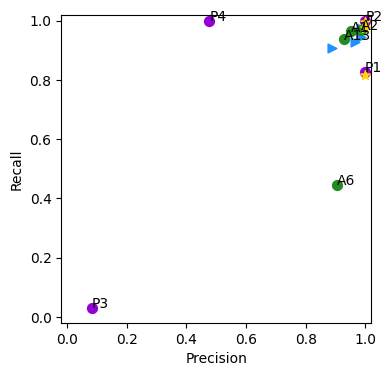

In [8]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, adata in enumerate(CRC_adata):
    if ("cell_labels" in adata.obs.columns) & ("ref_assignments" in list(adata.obsm.keys())):
        sub = ((adata.obs.cell_labels != "undetermined")&(adata.obsm["ref_assignments"]["consensus_call"]!="no confident assignment")).tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obsm["ref_assignments"]["consensus_call"]=="genomically_tumour")
        sub = ~np.isnan(ref_cancer)
        precision = sklearn.metrics.precision_score(ref_cancer[sub], our_cancer[sub])
        recall = sklearn.metrics.recall_score(ref_cancer[sub], our_cancer[sub])
        
        plt.scatter(precision, recall, marker=">", s=40, c="dodgerblue")


for i, adata in enumerate(AML_S2_adata):
    #if ("cell_labels" in adata.obs.columns) & ("ref_assignments" in list(adata.obsm.keys())):
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obsm["ref_assignments"]["PhiSICShealthy"]<0.5 if i<2 else adata.obsm["ref_assignments"]["cancer_final"])
        sub = ~np.isnan(ref_cancer)
        precision = sklearn.metrics.precision_score(ref_cancer[sub], our_cancer[sub])
        recall = sklearn.metrics.recall_score(ref_cancer[sub], our_cancer[sub])
        plt.scatter(precision, recall, marker="o", s=50, c="darkviolet")
        ax.annotate(AML_S2_patients[i], (precision, recall))

for i, adata in enumerate(AML_10X_adata):
    if ("cell_labels" in adata.obs.columns) & ("ref_assignments" in list(adata.obsm.keys())):
        if "Healthy" in adata.obsm["ref_assignments"].columns:
            sub = (adata.obs.cell_labels != "undetermined").tolist()
            adata = adata[sub]
            our_cancer = np.array(adata.obs.cell_labels == "cancer")
            ref_cancer = np.array(adata.obsm["ref_assignments"]["Healthy"]<0.5)
            sub = ~np.isnan(ref_cancer)
            precision = sklearn.metrics.precision_score(ref_cancer[sub], our_cancer[sub])
            recall = sklearn.metrics.recall_score(ref_cancer[sub], our_cancer[sub])
            plt.scatter(precision, recall, marker="o", s=50, c="forestgreen")
            ax.annotate(AML_10X_patients[i], (precision, recall))

for i, adata in enumerate(LUNG_adata):
    if ("cell_labels" in adata.obs.columns) & ("ref_assignments" in list(adata.obsm.keys())):
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obsm["ref_assignments"]["cna_clone"]=="CNA")
        sub = ~np.isnan(ref_cancer)
        precision = sklearn.metrics.precision_score(ref_cancer[sub], our_cancer[sub])
        recall = sklearn.metrics.recall_score(ref_cancer[sub], our_cancer[sub])
        
        plt.scatter(precision, recall, marker="*", s=50, c="gold")
        #ax.annotate(LUNG_patients[i], (precision, recall))
        

plt.ylabel("Recall")
    
plt.xlabel("Precision")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
save_path = "../figures/Fig1_C_prec-recall-vs-ref.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

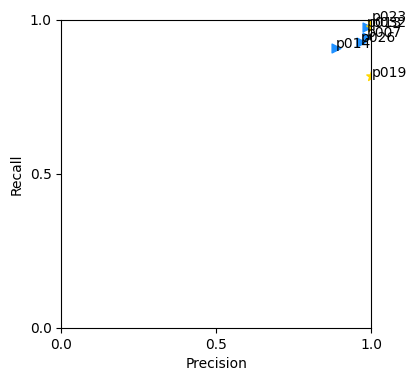

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, adata in enumerate(CRC_adata):
    if ("cell_labels" in adata.obs.columns) & ("ref_assignments" in list(adata.obsm.keys())):
        sub = ((adata.obs.cell_labels != "undetermined")&(adata.obsm["ref_assignments"]["consensus_call"]!="no confident assignment")).tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obsm["ref_assignments"]["consensus_call"]=="genomically_tumour")
        sub = ~np.isnan(ref_cancer)
        precision = sklearn.metrics.precision_score(ref_cancer[sub], our_cancer[sub])
        recall = sklearn.metrics.recall_score(ref_cancer[sub], our_cancer[sub])
        
        plt.scatter(precision, recall, marker=">", s=40, c="dodgerblue")
        ax.annotate(CRC_patient[i], (precision, recall))



for i, adata in enumerate(LUNG_adata):
    if ("cell_labels" in adata.obs.columns) & ("ref_assignments" in list(adata.obsm.keys())):
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obsm["ref_assignments"]["cna_clone"]=="CNA")
        sub = ~np.isnan(ref_cancer)
        precision = sklearn.metrics.precision_score(ref_cancer[sub], our_cancer[sub])
        recall = sklearn.metrics.recall_score(ref_cancer[sub], our_cancer[sub])
        
        plt.scatter(precision, recall, marker="*", s=50, c="gold")
        ax.annotate(LUNG_patients[i], (precision, recall))
        

plt.ylabel("Recall")
plt.xlabel("Precision")

plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])


plt.xlim(0, 1)
plt.ylim(0, 1)
save_path = "../figures/Fig4_prec-recall-vs-ref-CRC-LUNG.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

In [10]:
from random import shuffle


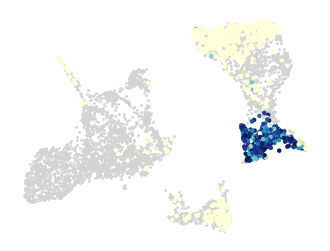

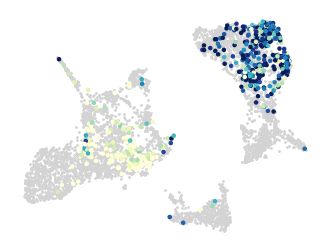

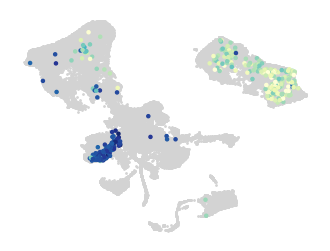

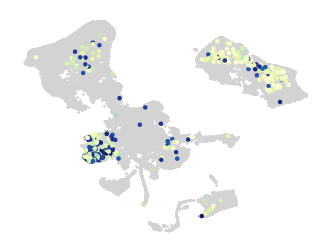

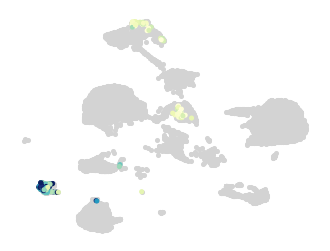

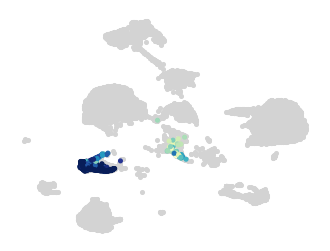

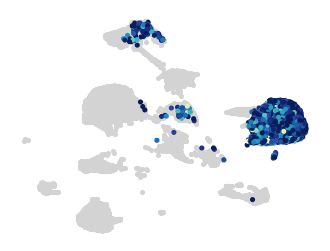

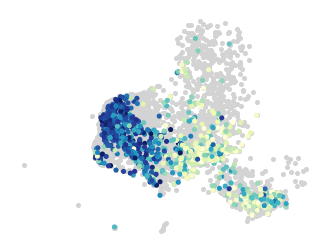

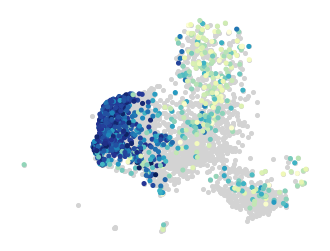

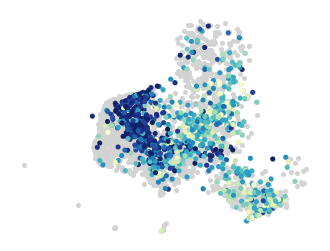

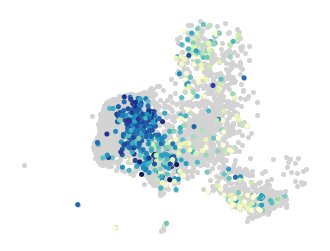

In [11]:

umap_all = pd.read_csv("../ref_data/AML_MutaSeq/umap_all.csv", index_col=0)
for i, adata in enumerate(AML_S2_adata):
    if ("cell_labels" in adata.obs.columns) & (i>=2):
        fig, ax = plt.subplots(1,1,figsize=(4,3))
        plt.scatter(umap_all.UMAP_1, umap_all.UMAP_2, color="lightgrey", s=1)
        ax.axis('off')
        umap = adata.obsm["umap"]
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                c = adata.obs.cancer_weight-adata.obs.healthy_weight, cmap=cell_cmap,vmin=0, vmax=1,
                s=5)  
        fig.savefig("../figures/Fig2_"+AML_S2_patients[i]+"_weights-UMAP.png", bbox_inches='tight', format='png', dpi=300)
        plt.show()
        
umap_all = pd.read_csv("../ref_data/AML_10X/umap_all.csv", index_col=0)
for i, adata in enumerate(AML_10X_adata):
    if ("cell_labels" in adata.obs.columns) & ("ref_assignments" not in list(adata.obsm.keys())):
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        idx = adata.obs.index.tolist()
        shuffle(idx)
        adata = adata[idx]
        fig, ax = plt.subplots(1,1,figsize=(4,3))
        plt.scatter(umap_all.UMAP_1, umap_all.UMAP_2, color="lightgrey", s=1)
        ax.axis('off')
        umap = adata.obsm["umap"]
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                c = adata.obs.cancer_weight, cmap=cell_cmap, vmin=0, vmax=1, 
                s=5)  
        fig.savefig("../figures/Fig2_"+AML_10X_patients[i]+"_weights-UMAP.png", bbox_inches='tight', format='png', dpi=300)

        plt.show()
        
        
umap_all = pd.read_csv("../ref_data/LUNG/umap_from_SeuratObj.csv", index_col=0)
sub = [i in LUNG_patients for i in umap_all.index.str.split("_").str[0].str[0:4]]
umap_all = umap_all.loc[sub]
for j, adata in enumerate(LUNG_adata):
    if "cancer_weight" in adata.obs.columns:
        fig, ax = plt.subplots(1,1,figsize=(4,3))
        ax.axis('off')

        umap = adata.obsm["umap"]
        plt.scatter(umap_all.UMAP_1, umap_all.UMAP_2, 
                    color = "lightgrey",
                    s=7) 
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                    c = adata.obs["cancer_weight"], cmap=cell_cmap, vmin=0, vmax=1,
                    s=7)   
        #plt.title(LUNG_patients[j])
        fig.savefig("../figures/S16_"+LUNG_patients[j]+"_weights-UMAP.pdf", bbox_inches='tight', format='pdf', dpi=300)
        plt.show()


umap_all = pd.read_csv("../ref_data/CRC/umap_all.csv", index_col=0)
for j, adata in enumerate(CRC_adata):
    if "cancer_weight" in adata.obs.columns:
        fig, ax = plt.subplots(1,1,figsize=(4,3))
        ax.axis('off')

        umap = adata.obsm["umap"]
        plt.scatter(umap_all.UMAP_1, umap_all.UMAP_2, 
                    color = "lightgrey",
                    s=7) 
        plt.scatter(umap.UMAP_1, umap.UMAP_2, 
                    c = adata.obs["cancer_weight"], cmap=cell_cmap, vmin=0, vmax=1,
                    s=7)   
        fig.savefig("../figures/S16_"+CRC_patient[j]+"_weights-UMAP.pdf", bbox_inches='tight', format='pdf', dpi=300)
        plt.show()




['B cells' 'Dendritic' 'Early myeloid' 'Erythroid' 'Immature' 'Monocytes'
 'NK cells' 'Other' 'T cells']
['B cells' 'Early myeloid' 'Erythroid' 'Immature' 'Monocytes' 'NK cells'
 'Other' 'T cells']
['B cells' 'Dendritic' 'Early myeloid' 'Erythroid' 'Immature' 'Monocytes'
 'NK cells' 'Other' 'T cells']
['B cells' 'Dendritic' 'Early myeloid' 'Erythroid' 'Immature' 'Monocytes'
 'NK cells' 'Other' 'T cells']
['B cells' 'Dendritic' 'Early myeloid' 'Immature' 'Monocytes' 'NK cells'
 'T cells']
['B cells' 'Early myeloid' 'Erythroid' 'Immature' 'Monocytes' 'NK cells'
 'Other' 'T cells']


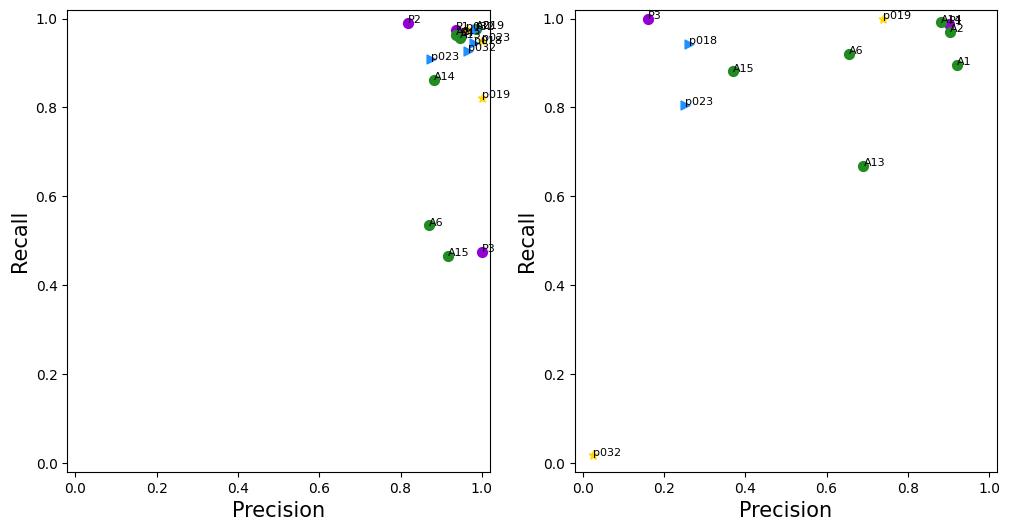

In [118]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

fs = 8

for i, adata in enumerate(AML_S2_adata):
    sub = (adata.obs.cell_labels != "undetermined").tolist()
    adata = adata[sub]
    our_cancer = np.array(adata.obs.cell_labels == "cancer")
    ref_cancer = np.array(adata.obs.celltype == "Blasts" )
    precision = sklearn.metrics.precision_score(ref_cancer, our_cancer)
    recall = sklearn.metrics.recall_score(ref_cancer, our_cancer)
    axs[0].scatter(precision, recall, marker="o", s=50, c="darkviolet")
    axs[0].annotate(AML_S2_patients[i], (precision, recall), fontsize=fs)
    
    our_healthy = np.array(adata.obs.cell_labels == "healthy")
    ref_healthy = np.array(adata.obs.celltype == "T/NK cells" )    
    if np.sum(ref_healthy)>50:
        precision = sklearn.metrics.precision_score(ref_healthy, our_healthy)
        recall = sklearn.metrics.recall_score(ref_healthy, our_healthy)
        axs[1].scatter(precision, recall, marker="o", s=50, c="darkviolet")
        axs[1].annotate(AML_S2_patients[i], (precision, recall), fontsize=fs)
    
AML_10X_cancer_cell_types = ['Early myeloid' ,'Erythroid' ,'Immature', 'Monocytes']
AML_10X_healthy_cell_types = ['B cells'  ,'NK cells', 'T cells']
for i, adata in enumerate(AML_10X_adata):
    if ("cell_labels" in adata.obs.columns):
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array([i in AML_10X_cancer_cell_types for i in adata.obs.celltype] )
        if np.sum(ref_cancer)>50:
            precision = sklearn.metrics.precision_score(ref_cancer, our_cancer)
            recall = sklearn.metrics.recall_score(ref_cancer, our_cancer)
            axs[0].scatter(precision, recall, marker="o", s=50, c="forestgreen")
            axs[0].annotate(AML_10X_patients[i], (precision, recall), fontsize=fs)
        
        our_healthy = np.array(adata.obs.cell_labels == "healthy")
        ref_healthy = np.array([i in AML_10X_healthy_cell_types for i in adata.obs.celltype] ) 
        print(np.unique(adata.obs.celltype))
        if np.sum(ref_healthy)>50:
            precision = sklearn.metrics.precision_score(ref_healthy, our_healthy)
            recall = sklearn.metrics.recall_score(ref_healthy, our_healthy)
            axs[1].scatter(precision, recall, marker="o", s=50, c="forestgreen")
            axs[1].annotate(AML_10X_patients[i], (precision, recall), fontsize=fs)
        
LUNG_healthy_cell_type = ['Ciliated', 'Club']
for i, adata in enumerate(LUNG_adata):
    if ("cell_labels" in adata.obs.columns) :
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obs.celltype == "Tumor" )
        if np.sum(ref_cancer)>50:
            precision = sklearn.metrics.precision_score(ref_cancer, our_cancer)
            recall = sklearn.metrics.recall_score(ref_cancer, our_cancer)
            axs[0].scatter(precision, recall, marker="*", s=40, c="gold")
            axs[0].annotate(LUNG_patients[i], (precision, recall), fontsize=fs)  
        
        our_healthy = np.array(adata.obs.cell_labels == "healthy")
        ref_healthy = np.array([i in LUNG_healthy_cell_type for i in adata.obs.celltype] ) 
        if np.sum(ref_healthy)>50:
            precision = sklearn.metrics.precision_score(ref_healthy, our_healthy)
            recall = sklearn.metrics.recall_score(ref_healthy, our_healthy)
            axs[1].scatter(precision, recall, marker="*", s=40, c="gold")
            axs[1].annotate(LUNG_patients[i], (precision, recall), fontsize=fs)  
            
CRC_healthy_cell_type = ['Goblet', 'Immature Goblet']
for i, adata in enumerate(CRC_adata):
    if ("cell_labels" in adata.obs.columns) :
        sub = (adata.obs.cell_labels != "undetermined").tolist()
        adata = adata[sub]
        our_cancer = np.array(adata.obs.cell_labels == "cancer")
        ref_cancer = np.array(adata.obs.celltype == "Tumour" )
        if np.sum(ref_cancer)>50:
            precision = sklearn.metrics.precision_score(ref_cancer, our_cancer)
            recall = sklearn.metrics.recall_score(ref_cancer, our_cancer)
            axs[0].scatter(precision, recall, marker=">", s=40, c="dodgerblue")
            axs[0].annotate(LUNG_patients[i], (precision, recall), fontsize=fs)  
        
        our_healthy = np.array(adata.obs.cell_labels == "healthy")
        ref_healthy = np.array([i in CRC_healthy_cell_type for i in adata.obs.celltype] ) 
        if np.sum(ref_healthy)>50:
            precision = sklearn.metrics.precision_score(ref_healthy, our_healthy)
            recall = sklearn.metrics.recall_score(ref_healthy, our_healthy)
            axs[1].scatter(precision, recall, marker=">", s=40, c="dodgerblue")
            axs[1].annotate(LUNG_patients[i], (precision, recall), fontsize=fs)  

for ax in axs:
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.set_ylabel("Recall", fontsize=15)
    ax.set_xlabel("Precision", fontsize=15)
plt.show()

save_path = "../figures/S9_prec-recall-vs-celltypes.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

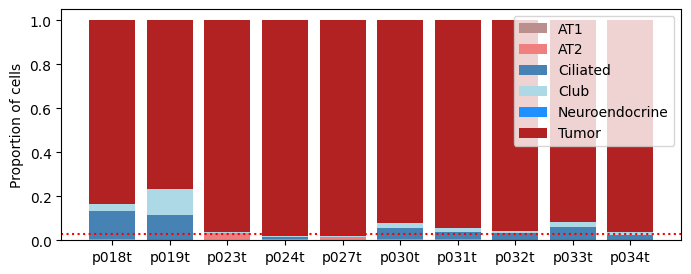

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,3))


ct = pd.read_csv("../ref_data/LUNG/celltype_from_SeuratObj.csv", index_col=0)
ct["patient"]=ct.index.str.split("_").str[0]
ct = ct.loc[ct["patient"].str[-1]=="t"]

celltype_color_map = {"AT1":"rosybrown", 'Club':"lightblue", 
                      'Ciliated':"steelblue", "At1":"peachpuff", 'AT2':"lightcoral",
                      "Tumor":"firebrick", 'Neuroendocrine':"dodgerblue"
                     }
 
patients = np.unique(ct["patient"], return_counts=True)[0]
patients_counts = np.unique(ct["patient"], return_counts=True)[1]
bottom = np.zeros(len(patients)).astype(float)

for ctype in np.unique(ct["Idents(cohort_data)"]):

    loc = ct["Idents(cohort_data)"]==ctype
    p_c = np.unique(ct.loc[loc]["patient"], return_counts=True)
    y  = np.zeros(bottom.shape)
    y[[i in p_c[0] for i in patients]] = p_c[1]/patients_counts[[i in p_c[0] for i in patients]]
    plt.bar(patients, y, bottom=bottom, color=celltype_color_map[ctype], label=ctype)
    bottom+=y
plt.axhline(y=0.03, color='r', linestyle=':')
save_path = "../figures/S13_A_LUNG-patient-celltypes.pdf"
plt.ylabel("Proportion of cells")
plt.legend()
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()

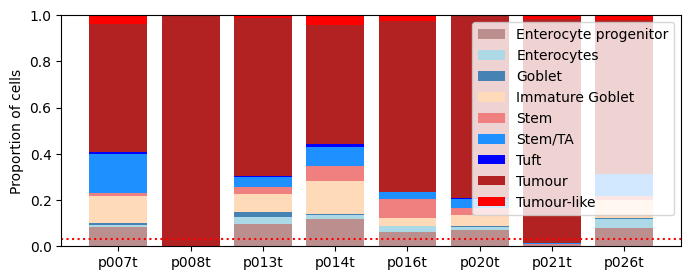

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,3))


ct = pd.read_csv("../ref_data/CRC/celltype_all.csv", index_col=0)


celltype_color_map = {'Enterocyte progenitor':"rosybrown", 'Enterocytes':"lightblue", 
                      'Goblet':"steelblue", 'Immature Goblet':"peachpuff", 'Stem':"lightcoral",
                      "Tumour":"firebrick", 'Stem/TA':"dodgerblue", 'Tuft':"blue", 'Tumour-like':"red"
                     }
 
patients = np.unique(ct["sample"], return_counts=True)[0]
patients_counts = np.unique(ct["sample"], return_counts=True)[1]
bottom = np.zeros(len(patients)).astype(float)

for ctype in np.unique(ct["cell_type_epi"]):

    loc = ct["cell_type_epi"]==ctype
    p_c = np.unique(ct.loc[loc]["sample"], return_counts=True)
    y  = np.zeros(bottom.shape)
    y[[i in p_c[0] for i in patients]] = p_c[1]/patients_counts[[i in p_c[0] for i in patients]]
    plt.bar(patients, y, bottom=bottom, color=celltype_color_map[ctype], label=ctype)
    bottom+=y
plt.axhline(y=0.03, color='r', linestyle=':')
save_path = "../figures/S13_B_CRC-patient-celltypes.pdf"
plt.ylabel("Proportion of cells")
plt.legend()
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()